In [5]:
# -*- coding: utf-8 -*-
#
# ベイズ推定による正規分布の推定
#
# 2015/06/13 ver1.0
# 2019/09/10 ver1.1 Python2->3に関するFuture Warningに対処主に描画関係
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal
from scipy.stats import norm

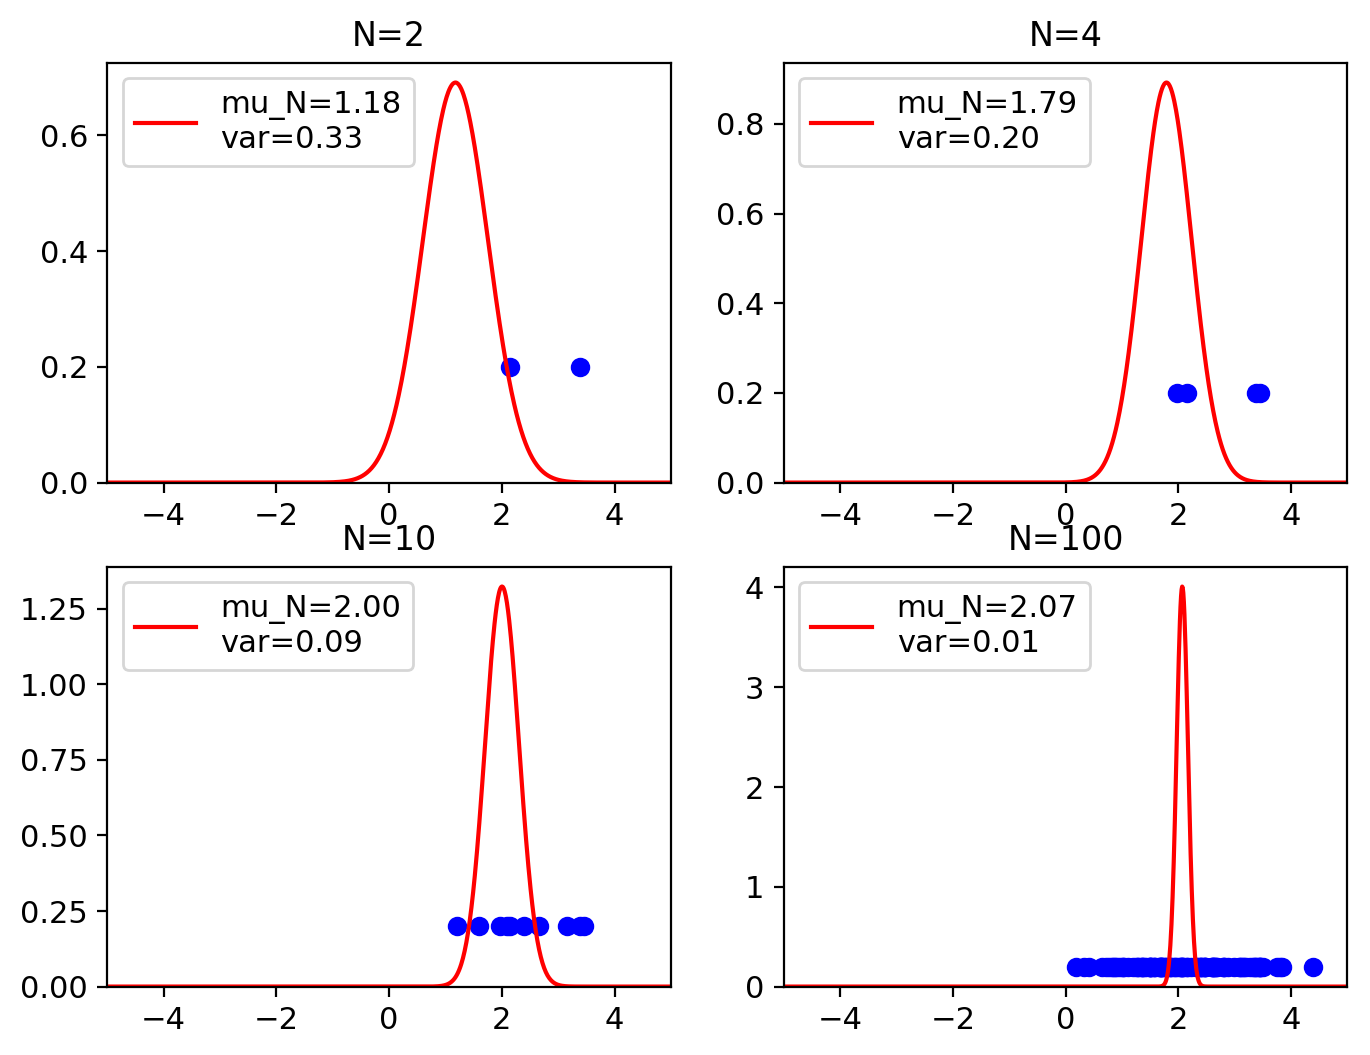

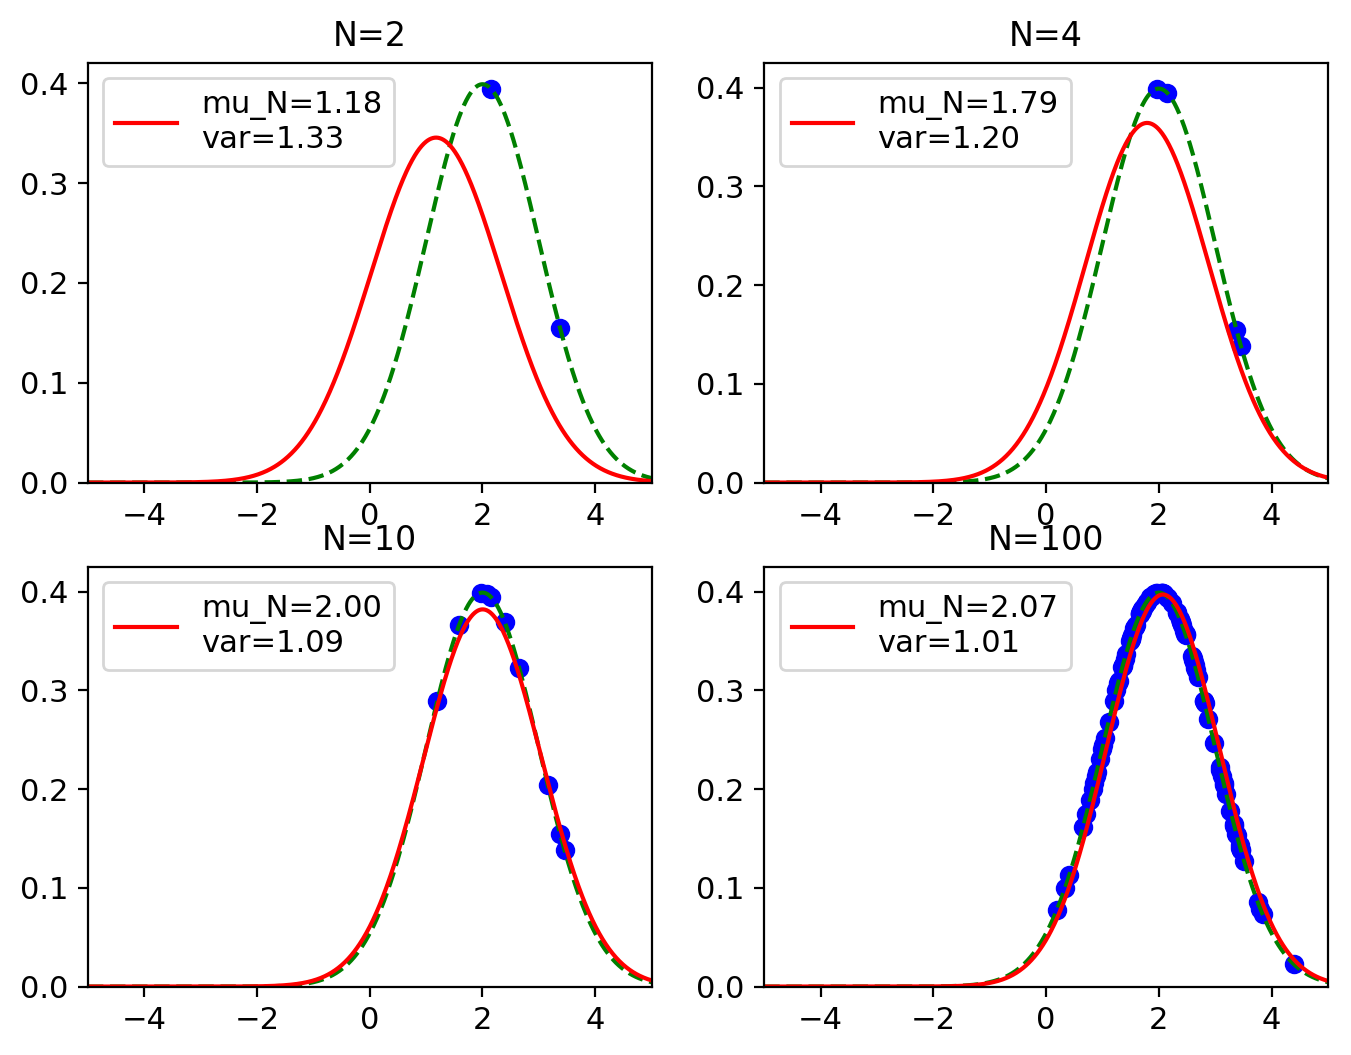

In [6]:
# Main
if __name__ == '__main__':

    # 真の分布
    mu_true = 2.0
    beta_true = 1.0

    # 事前分布
    mu_0 = -2.0
    beta_0 = 1.0

    fig1 = plt.figure(figsize=(8,6))
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.rcParams['font.family'] = 'DejaVu Sans'
    fig2 = plt.figure(figsize=(8,6))
    ds = normal(loc=mu_true, scale=1.0/beta_true, size=100)

    for c, n in enumerate([2,4,10,100]): # トレーニングセットのデータ数
        trainset = ds[0:n]
        mu_ML = np.mean(trainset)
        mu_N = (beta_true*mu_ML + beta_0*mu_0/n)/(beta_true+beta_0/n)
        beta_N = beta_0 + n*beta_true

    # 平均μの推定結果を表示
        subplot = fig1.add_subplot(2,2,c+1)
        subplot.set_title("N=%d" % n)
        linex = np.arange(-10,10.1,0.01)

        # 平均μの確率分布
        sigma = 1.0/beta_N
        mu_est = norm(loc=mu_N, scale=np.sqrt(sigma))
        label = "mu_N=%.2f\nvar=%.2f" % (mu_N, sigma)
        subplot.plot(linex, mu_est.pdf(linex), color='red', label=label)
        subplot.legend(loc=2)

        # トレーニングセットを表示
        subplot.scatter(trainset, [0.2]*n, marker='o', color='blue')
        subplot.set_xlim(-5,5)
        subplot.set_ylim(0)


    # 次に得られるデータの推定分布を表示
        subplot = fig2.add_subplot(2,2,c+1)
        subplot.set_title("N=%d" % n)
        linex = np.arange(-10,10.1,0.01)

        # 真の分布を表示
        orig = norm(loc=mu_true, scale=np.sqrt(1.0/beta_true))
        subplot.plot(linex, orig.pdf(linex), color='green', linestyle='--')

        # 推定分布を表示
        sigma = 1.0/beta_true+1.0/beta_N
        mu_est = norm(loc=mu_N, scale=np.sqrt(sigma))
        label = "mu_N=%.2f\nvar=%.2f" % (mu_N, sigma)
        subplot.plot(linex, mu_est.pdf(linex), color='red', label=label)
        subplot.legend(loc=2)

        # トレーニングセットを表示
        subplot.scatter(trainset, orig.pdf(trainset), marker='o', color='blue')
        subplot.set_xlim(-5,5)
        subplot.set_ylim(0)

#     fig1.show()
#     fig2.show()
    plt.show()